In [62]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
from synth_dim_model import *
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import get_cmap

In [63]:
def LZ_hamiltonian(nu, delta, t):
    hamiltonian = np.array([[nu*t/2,delta/2],[delta/2,-nu*t/2]])
    return hamiltonian

In [108]:
t_max = 10
dt = 0.01
steps = 10000
times = np.linspace(-t_max, t_max, steps)

nu = 2
delta = 1

initial_hamiltonian = LZ_hamiltonian(nu, delta, -t_max)
_, initial_eigenvectors = exact_diagonalize(initial_hamiltonian)
psi_0 = initial_eigenvectors[0]

psi = psi_0.copy()

adiabatic_energies = []
adiabatic_wavefunctions = []
adiabatic_probabilities = []
adiabatic_overlaps = []
true_energies = []

for index, t in enumerate(times):
        instantaneous_hamiltonian = LZ_hamiltonian(nu, delta, t)
        
        eigenvalues, eigenvectors = exact_diagonalize(instantaneous_hamiltonian)
        true_energies.append(eigenvalues)
        
        psi = evolve_wavefunction(psi, instantaneous_hamiltonian, dt)
        psi = psi / np.linalg.norm(psi)  
                
        adiabatic_wavefunctions.append(psi)
        
        adiabatic_energy = np.real(np.conj(psi).T @ instantaneous_hamiltonian @ psi)
        adiabatic_energies.append(adiabatic_energy)
        
        overlap = [np.dot(np.conj(eigenvectors[i]).T, psi) for i in range(len(psi))] 
        probability = [np.abs(np.conj(eigenvectors[i]).T @ psi)**2 for i in range(len(psi))]
               
        adiabatic_probabilities.append(probability)
        adiabatic_overlaps.append(overlap)
        
adiabatic_energies = np.array(adiabatic_energies)
adiabatic_wavefunctions = np.array(adiabatic_wavefunctions)
adiabatic_probabilities = np.array(adiabatic_probabilities)
adiabatic_overlaps = np.array(adiabatic_overlaps)
true_energies = np.array(true_energies)
        

<>:3: SyntaxWarning: invalid escape sequence '\D'
<>:3: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Joe\AppData\Local\Temp\ipykernel_13752\817989647.py:3: SyntaxWarning: invalid escape sequence '\D'
  fig.suptitle(f"Landau-Zener Model: $\\nu = {nu}$, $\Delta = {delta}$, Time Steps = {steps}")


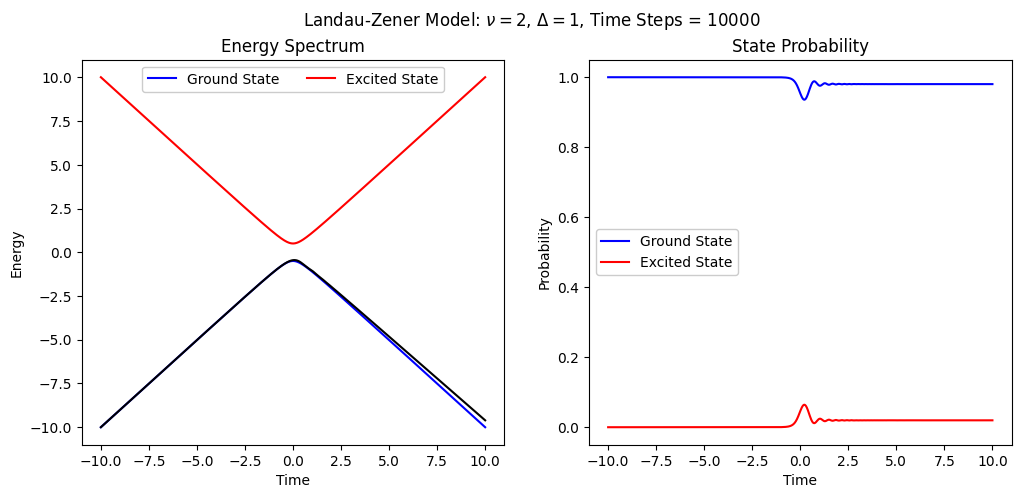

In [109]:
fig, (ax1,ax2) = plt.subplots(figsize = (12,5), ncols = 2)

fig.suptitle(f"Landau-Zener Model: $\\nu = {nu}$, $\Delta = {delta}$, Time Steps = {steps}")

ax1.plot(times, true_energies[:,0], "-b", label = "Ground State")
ax1.plot(times, true_energies[:,1], "-r", label = "Excited State")
ax1.plot(times, adiabatic_energies, "-k")
ax1.set_title(f"Energy Spectrum")
ax1.set_xlabel("Time")
ax1.set_ylabel("Energy")
ax1.legend(loc = 'upper center', ncols = 3, framealpha = 1)

ax2.plot(times, adiabatic_probabilities[:,0], "-b", label = "Ground State")
ax2.plot(times, adiabatic_probabilities[:,1], "-r", label = "Excited State")
ax2.set_title(f"State Probability")
ax2.set_xlabel("Time")
ax2.set_ylabel("Probability")
ax2.legend(loc = 'center left', framealpha = 1)